# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

## Inicialización

In [94]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats



## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames
url_plans = 'https://raw.githubusercontent.com/Davichobacter/data_science_tt/refs/heads/main/Sprint_5_DATA/megaline_plans.csv'
plans_df = pd.read_csv(url_plans)

url_calls = 'https://raw.githubusercontent.com/Davichobacter/data_science_tt/refs/heads/main/Sprint_5_DATA/megaline_calls.csv'
calls_df = pd.read_csv(url_calls)

url_internet = 'https://raw.githubusercontent.com/Davichobacter/data_science_tt/refs/heads/main/Sprint_5_DATA/megaline_internet.csv'
internet_df = pd.read_csv(url_internet)

url_messages = 'https://raw.githubusercontent.com/Davichobacter/data_science_tt/refs/heads/main/Sprint_5_DATA/megaline_messages.csv'
messages_df = pd.read_csv(url_messages)

url_users = 'https://raw.githubusercontent.com/Davichobacter/data_science_tt/refs/heads/main/Sprint_5_DATA/megaline_users.csv'
users_df = pd.read_csv(url_users)

In [ ]:
# Carga los archivos de datos en diferentes DataFrames
calls_df = pd.read_csv('/datasets/megaline_calls.csv')

internet_df = pd.read_csv('/datasets/megaline_internet.csv')

messages_df = pd.read_csv('/datasets/megaline_messages.csv')

plans_df = pd.read_csv('/datasets/megaline_plans.csv')

users_df = pd.read_csv('/datasets/megaline_users.csv')

## Preparar los datos

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]

## Tarifas

In [3]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
plans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


In [4]:
# Imprime una muestra de los datos para las tarifas

plans_df.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]


> El DataFrame `plans_df` contiene la información relativa a dos tarifas: Surf y Ultimate. Tiene 8 columnas con los siguientes tipos de datos:
> - `messages_included`: int64 (sin valores nulos) - Número de mensajes incluidos en la tarifa.
> - `mb_per_month_included`: int64 (sin valores nulos) - Megabytes de internet incluidos en la tarifa.
> - `minutes_included`: int64 (sin valores nulos) - Minutos de llamadas incluidos en la tarifa.
> - `usd_monthly_pay`: int64 (sin valores nulos) - Costo mensual de la tarifa en USD.
> - `usd_per_gb`: int64 (sin valores nulos) - Costo por GB adicional en USD.
> - `usd_per_message`: float64 (sin valores nulos) - Costo por mensaje adicional en USD.
> - `usd_per_minute`: float64 (sin valores nulos) - Costo por minuto adicional en USD.
> - `plan_name`: object (sin valores nulos) - Nombre de la tarifa (surf o ultimate).

> **Problemas y posibles soluciones:**
> - No se observan datos ausentes ni tipos de datos inadecuados en este DataFrame. Todos los datos están completos y con el tipo correcto. No se requieren correcciones adicionales en este DataFrame.

### Corregir datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

> No se observaron datos ausentes ni tipos de datos inadecuados en este DataFrame. Todos los valores se encuentran completos y con el tipo de dato correcto. Por lo tanto, no se requieren correcciones adicionales en este DataFrame.


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [5]:
plans_df['gb_per_month_included'] = np.int64(plans_df['mb_per_month_included'] / 1024)
plans_df.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30


> Se agregó la columna **«GB por mes»** para que coincida con la tarifa correspondiente de cada plan. De esta manera, si posteriormente se requiere realizar algún cálculo con valores enteros (por ejemplo, para determinar el uso excedente o calcular costos adicionales), el proceso será más sencillo y preciso.


## Usuarios/as

In [6]:
# Imprime la información general/resumida sobre el DataFrame de usuarios

users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [7]:
# Porcentaje de valores no nulos en la columna Churn_Date
users_df['churn_date'].notnull().sum() / users_df.shape[0] *100

np.float64(6.800000000000001)

In [8]:
# Imprime una muestra de datos para usuarios

users_df.sample(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
339,1339,Mariette,Mclean,27,"Charlotte-Concord-Gastonia, NC-SC MSA",2018-03-03,surf,NaN
337,1337,Lucius,Arnold,31,"Riverside-San Bernardino-Ontario, CA MSA",2018-03-11,surf,NaN
459,1459,Santos,Head,40,"San Francisco-Oakland-Berkeley, CA MSA",2018-04-27,ultimate,NaN
405,1405,Shella,Hunter,34,"Indianapolis-Carmel-Anderson, IN MSA",2018-06-22,ultimate,NaN
164,1164,Kam,Macias,31,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-02-17,ultimate,NaN
478,1478,Elane,David,51,"Portland-Vancouver-Hillsboro, OR-WA MSA",2018-06-28,ultimate,NaN
258,1258,Kai,Russell,39,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-07-12,surf,NaN
53,1053,Piper,Espinoza,27,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-07-30,surf,NaN
129,1129,Marin,Bolton,70,"Baton Rouge, LA MSA",2018-11-10,surf,2018-12-27
74,1074,Particia,Fuller,69,"Knoxville, TN MSA",2018-11-26,ultimate,NaN


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

> El DataFrame contiene la información relativa a dos tarifas. Surf y Ultimate. Cada tarifa incluye información detallada sobre los datos incluidos, los megabytes de internet, los minutos de llamadas, el pago mensual, el costo por GB adicional, el costo por mensaje adicional y el costo por minuto adicional.

> El DataFrame `users_df` contiene información sobre los 500 clientes de Megaline. Tiene 8 columnas con los siguientes tipos de datos:
> - `user_id`: int64 (sin valores nulos) - Identificador único para cada usuario.
> - `first_name`: object (sin valores nulos) - Nombre del usuario.
> - `last_name`: object (sin valores nulos) - Apellido del usuario.
> - `age`: int64 (sin valores nulos) - Edad del usuario.
> - `city`: object (sin valores nulos) - Ciudad de residencia del usuario.
> - `reg_date`: object (sin valores nulos) - Fecha de registro del usuario.
> - `plan`: object (sin valores nulos) - Plan de suscripción del usuario (Surf o Ultimate).
> - `churn_date`: object (34 valores no nulos) - Fecha en que el usuario dejó de usar el servicio. La mayoría de los valores son nulos, lo que indica que la mayoría de los usuarios siguen activos.

> **Problemas y posibles soluciones:**
> - La columna `reg_date` y `churn_date` son de tipo `object`. Deberían ser convertidas a tipo datetime para facilitar el análisis temporal.
> - La columna `churn_date` tiene muchos valores ausentes (NaN). Esto es esperado, ya que representa la fecha en que un usuario dejó de usar el servicio, y la mayoría de los usuarios siguen activos. No es necesario imputar estos valores ausentes, ya que su ausencia tiene un significado (el usuario no ha dejado el servicio).

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [9]:
users_df['reg_date'] = pd.to_datetime(users_df['reg_date'])
users_df['churn_date'] = pd.to_datetime(users_df['churn_date'])

In [10]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


In [11]:
users_df.sample(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
264,1264,Jessie,Hill,69,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-05-03,ultimate,NaT
305,1305,Gwenn,Gross,18,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-05-08,surf,NaT
205,1205,Rafael,Wade,43,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-05,surf,NaT
84,1084,Wiley,Mckinney,21,"Miami-Fort Lauderdale-West Palm Beach, FL MSA",2018-06-04,surf,2018-11-11
59,1059,Avril,Richardson,34,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-04-22,ultimate,NaT


> Se corrigieron los tipos de datos de las columnas `reg_date` y `churn_date` del DataFrame `users_df`, convirtiéndolas de tipo `object` a `datetime`. Esta conversión resulta fundamental para realizar análisis temporales con dichas columnas, como la extracción del mes o del año, o el cálculo de duraciones entre fechas. Los valores ausentes en `churn_date` se conservaron, ya que representan a los usuarios que aún se encuentran activos.


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [12]:
users_df['reg_month'] = users_df['reg_date'].dt.month
users_df['reg_year'] = users_df['reg_date'].dt.year

In [13]:
users_df.sample(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,reg_month,reg_year
312,1312,Kory,Emerson,42,"Fresno, CA MSA",2018-01-26,surf,NaT,1,2018
398,1398,German,Thompson,30,"Denver-Aurora-Lakewood, CO MSA",2018-10-22,surf,NaT,10,2018
402,1402,Jesus,Berry,25,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-06-11,surf,2018-12-26,6,2018
276,1276,Karmen,Carney,20,"Phoenix-Mesa-Chandler, AZ MSA",2018-02-14,surf,NaT,2,2018
346,1346,Emmie,Gonzalez,59,"Tucson, AZ MSA",2018-04-26,ultimate,NaT,4,2018


> Se agregaron las columnas `reg_month` y `reg_year`, obtenidas a partir de la extracción del mes y el año de la columna `reg_date`. Esta información puede resultar útil para analizar los patrones de registro de usuarios a lo largo del tiempo y detectar posibles tendencias estacionales o periodos de mayor actividad.


## Llamadas

In [14]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas

calls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [15]:
# Imprime una muestra de datos para las llamadas

calls_df.sample(10)

,id,user_id,call_date,duration
6938,1032_88,1032,2018-12-10,8.97
22473,1082_514,1082,2018-06-02,0.00
62333,1223_516,1223,2018-08-06,8.92
39482,1147_229,1147,2018-07-27,1.73
43150,1157_179,1157,2018-10-03,14.90
1997,1009_419,1009,2018-12-08,5.88
78352,1280_410,1280,2018-10-15,0.00
43151,1157_180,1157,2018-09-30,9.66
46298,1167_381,1167,2018-11-18,0.00
82131,1296_19,1296,2018-12-25,16.44


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

> El DataFrame `calls_df` contiene información sobre las llamadas individuales realizadas por los usuarios. Tiene 4 columnas con los siguientes tipos de datos:
> - `id`: object (sin valores nulos) - Identificador único para cada llamada.
> - `user_id`: int64 (sin valores nulos) - Identificador del usuario que realizó la llamada.
> - `call_date`: object (sin valores nulos) - Fecha en que se realizó la llamada.
> - `duration`: float64 (sin valores nulos) - Duración de la llamada en minutos.

> **Problemas y posibles soluciones:**
> - La columna `call_date` es de tipo `object`. Debería ser convertida a tipo datetime para facilitar el análisis temporal.
> - La columna `duration` tiene valores de 0.00. Esto podría representar llamadas perdidas o muy cortas. Dependiendo del objetivo del análisis, estos valores podrían ser considerados atípicos o simplemente reflejar el comportamiento real del usuario. Por ahora, no es necesario corregirlos, pero es algo a tener en cuenta para análisis posteriores.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [16]:
calls_df['call_date'] = pd.to_datetime(calls_df['call_date'])

In [17]:
calls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


<Axes: xlabel='duration'>

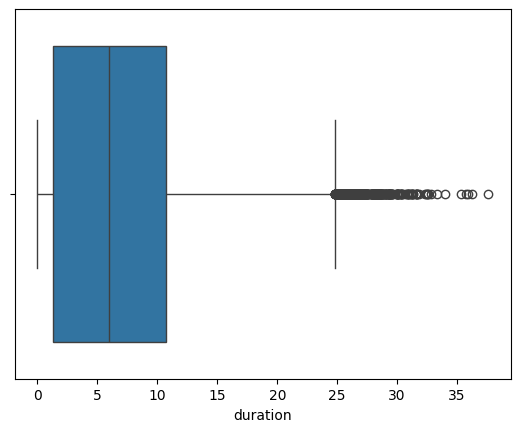

In [18]:
sns.boxplot(x=calls_df['duration'])

In [19]:
calls_df[calls_df['duration'] == 0].shape[0]

26834

> Se corrigió el tipo de dato de la columna `call_date` del DataFrame `calls_df`, convirtiéndola de tipo `object` a `datetime`. Esta conversión es esencial para poder realizar análisis temporales con dicha columna.  
No se realizaron modificaciones en la columna `duration`, a pesar de la presencia de valores iguales a 0.00, ya que estos pueden corresponder a llamadas perdidas o muy cortas, y se consideran parte del comportamiento real del usuario.


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [20]:
calls_df['month'] = calls_df['call_date'].dt.month

In [21]:
calls_df.sample(5)

,id,user_id,call_date,duration,month
127865,1459_9,1459,2018-12-06,0.14,12
94493,1336_361,1336,2018-08-29,2.26,8
23146,1084_193,1084,2018-11-07,14.29,11
70480,1251_491,1251,2018-12-12,0.00,12
54640,1196_530,1196,2018-11-27,12.01,11


> Se agregó la columna `month`, obtenida a partir de la extracción del mes de la columna `call_date`. Esta columna permitirá agrupar y analizar el comportamiento de los usuarios a nivel mensual, facilitando la identificación de patrones y tendencias en la actividad de llamadas a lo largo del tiempo.


## Mensajes

In [22]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes

messages_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [23]:
# Imprime una muestra de datos para los mensajes

messages_df.sample(10)

,id,user_id,message_date
21241,1132_498,1132,2018-09-27
48532,1326_69,1326,2018-10-21
19629,1126_384,1126,2018-09-17
59566,1379_43,1379,2018-12-26
55836,1352_197,1352,2018-10-20
37600,1249_74,1249,2018-08-13
55899,1354_16,1354,2018-09-14
30432,1192_128,1192,2018-11-21
2039,1027_22,1027,2018-08-14
13287,1088_265,1088,2018-11-04


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

> El DataFrame `messages_df` contiene información sobre los mensajes individuales enviados por los usuarios. Tiene 3 columnas con los siguientes tipos de datos:
> - `id`: object (sin valores nulos) - Identificador único para cada mensaje.
> - `user_id`: int64 (sin valores nulos) - Identificador del usuario que envió el mensaje.
> - `message_date`: object (sin valores nulos) - Fecha en que se envió el mensaje.

> **Problemas y posibles soluciones:**
> - La columna `message_date` es de tipo `object`. Debería ser convertida a tipo datetime para facilitar el análisis temporal.
> - No se observan datos ausentes en este DataFrame.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [24]:
messages_df['message_date'] = pd.to_datetime(messages_df['message_date'])

In [25]:
messages_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


In [26]:
messages_df.sample(5)

,id,user_id,message_date
3222,1036_57,1036,2018-08-19
19977,1127_32,1127,2018-06-25
42722,1280_243,1280,2018-09-24
5479,1052_236,1052,2018-12-02
50345,1329_150,1329,2018-11-27


> Se corrigió el tipo de dato de la columna `message_date` del DataFrame `messages_df`, convirtiéndola de tipo `object` a `datetime`. Esta conversión es importante para permitir la realización de análisis temporales con dicha columna, como el estudio de la actividad de mensajería por mes o por periodo específico.


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [27]:
messages_df['month'] = messages_df['message_date'].dt.month

In [28]:
messages_df.sample(5)

,id,user_id,message_date,month
17411,1114_311,1114,2018-10-21,10
70446,1458_129,1458,2018-12-16,12
57615,1363_7,1363,2018-10-23,10
8292,1061_298,1061,2018-10-17,10
5488,1052_245,1052,2018-12-19,12


> Se agregó la columna `month`, obtenida a partir de la extracción del mes de la columna `message_date`. Esta columna permitirá agrupar y analizar el comportamiento de los usuarios por mes, facilitando el estudio de la frecuencia y los patrones de envío de mensajes a lo largo del tiempo.


## Internet

In [29]:
# Imprime la información general/resumida sobre el DataFrame de internet

internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [30]:
# Imprime una muestra de datos para el tráfico de internet

internet_df.sample(10)

,id,user_id,session_date,mb_used
28571,1131_154,1131,2018-06-06,386.06
79244,1368_446,1368,2018-08-04,874.82
93612,1436_441,1436,2018-11-28,202.48
72302,1336_350,1336,2018-08-12,141.78
66933,1312_156,1312,2018-10-14,342.91
94131,1439_184,1439,2018-07-01,36.95
71611,1334_179,1334,2018-10-12,814.47
97610,1460_198,1460,2018-06-23,295.56
20573,1095_249,1095,2018-08-21,940.61
9110,1046_395,1046,2018-10-26,639.42


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

> El DataFrame `internet_df` contiene información sobre las sesiones individuales de internet de los usuarios. Tiene 4 columnas con los siguientes tipos de datos:
> - `id`: object (sin valores nulos) - Identificador único para cada sesión de internet.
> - `user_id`: int64 (sin valores nulos) - Identificador del usuario que realizó la sesión.
> - `session_date`: object (sin valores nulos) - Fecha en que se realizó la sesión.
> - `mb_used`: float64 (sin valores nulos) - Cantidad de megabytes usados en la sesión.

> **Problemas y posibles soluciones:**
> - La columna `session_date` es de tipo `object`. Debería ser convertida a tipo datetime para facilitar el análisis temporal.
> - La columna `mb_used` tiene valores de 0.00. Esto podría representar sesiones de internet muy cortas o conexiones fallidas. Al igual que con la duración de las llamadas, estos valores podrían ser considerados atípicos o simplemente reflejar el comportamiento real del usuario. Por ahora, no es necesario corregirlos, pero es algo a tener en cuenta para análisis posteriores.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [31]:
internet_df['session_date'] = pd.to_datetime(internet_df['session_date'])

In [32]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


In [33]:
internet_df[internet_df['mb_used'] == 0].shape[0]

13747

> En esta sección se corrigió el tipo de dato de la columna `session_date` del DataFrame `internet_df`, convirtiéndola de tipo `object` a `datetime`. Esta conversión es fundamental para poder realizar análisis temporales con dicha columna.  
No se realizaron modificaciones en la columna `mb_used`, a pesar de la presencia de valores iguales a 0.00, ya que estos pueden corresponder a sesiones de internet muy cortas o a conexiones fallidas, y se consideran parte del comportamiento real del usuario.


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [34]:
internet_df['month'] = internet_df['session_date'].dt.month

In [35]:
internet_df.sample(5)

,id,user_id,session_date,mb_used,month
49596,1222_95,1222,2018-07-16,285.38,7
26089,1122_44,1122,2018-12-30,7.12,12
19439,1088_169,1088,2018-10-17,0.00,10
6479,1037_11,1037,2018-12-24,251.84,12
80428,1375_158,1375,2018-12-06,87.16,12


> Se agregó la columna `month`, obtenida a partir de la extracción del mes de la columna `session_date`. Esta columna permitirá agrupar y analizar el comportamiento de los usuarios por mes en cuanto al uso de internet, facilitando la identificación de patrones de consumo y variaciones en la actividad a lo largo del tiempo.


# Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [36]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras

plans_df

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30


## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [37]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
monthly_calls = calls_df.groupby(['user_id', 'month']).size().reset_index(name='calls_made')
monthly_calls.sample(10)

,user_id,month,calls_made
149,1041,7,65
1177,1255,12,102
777,1166,10,28
1343,1295,10,72
1763,1387,11,81
2102,1465,9,106
1074,1233,11,35
464,1099,11,86
1532,1338,10,86
1313,1288,12,45


In [38]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
monthly_minutes = calls_df.groupby(['user_id', 'month'])['duration'].sum().reset_index(name='minutes_used')
monthly_minutes.sample(10)

,user_id,month,minutes_used
45,1010,11,245.37
528,1113,10,487.32
1318,1291,4,74.38
152,1041,10,424.69
2249,1498,8,244.57
1052,1228,10,174.07
954,1203,9,535.10
1722,1379,12,1045.24
761,1163,10,678.34
1158,1252,7,432.41


In [39]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
monthly_messages = messages_df.groupby(['user_id', 'month']).size().reset_index(name='messages_sent')
monthly_messages.sample(10)

,user_id,month,messages_sent
161,1055,11,95
1570,1429,12,17
196,1061,11,56
1720,1470,8,141
485,1132,11,166
113,1039,10,23
1691,1465,10,35
1155,1313,10,45
255,1077,3,72
1259,1339,7,78


In [40]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
monthly_internet = internet_df.groupby(['user_id', 'month'])['mb_used'].sum().reset_index(name='mb_used_monthly')
monthly_internet.sample(10)

,user_id,month,mb_used_monthly
800,1167,5,3367.18
879,1183,12,20848.36
1620,1353,8,22103.11
1577,1342,12,10998.39
137,1038,12,45020.31
893,1186,12,1948.94
1943,1415,11,23371.04
351,1075,10,11724.69
1171,1250,10,8511.32
909,1189,11,17200.13


[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [41]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
monthly_data = monthly_calls.merge(monthly_minutes, on=['user_id', 'month'], how='outer')
monthly_data = monthly_data.merge(monthly_messages, on=['user_id', 'month'], how='outer')
monthly_data = monthly_data.merge(monthly_internet, on=['user_id', 'month'], how='outer')

monthly_data.sample(10)

,user_id,month,calls_made,minutes_used,messages_sent,mb_used_monthly
1101,1232,12,92.0,611.23,3.0,17936.99
754,1157,7,46.0,296.52,NaN,6447.47
1039,1217,10,75.0,494.12,NaN,21224.93
730,1153,12,85.0,594.79,NaN,9006.32
668,1141,6,18.0,128.54,3.0,1990.02
271,1061,8,87.0,565.25,71.0,18424.54
2246,1491,6,64.0,373.47,54.0,11034.31
1580,1341,12,111.0,630.58,70.0,24142.40
1340,1288,10,42.0,268.48,NaN,14660.53
1872,1402,10,45.0,299.13,NaN,17302.54


In [42]:
# Añade la información de la tarifa
monthly_data = monthly_data.merge(users_df[['user_id', 'plan']], on='user_id', how='left')

monthly_data.sample(10)

,user_id,month,calls_made,minutes_used,messages_sent,mb_used_monthly,plan
865,1181,8,60.0,374.54,21.0,15246.59,surf
2227,1488,6,96.0,669.45,NaN,20108.83,surf
1458,1318,11,45.0,353.84,30.0,24675.50,surf
2161,1469,11,5.0,68.01,6.0,5281.19,surf
319,1068,11,34.0,193.22,NaN,13994.14,surf
560,1120,4,47.0,268.95,41.0,23382.83,surf
877,1182,12,33.0,224.78,2.0,17659.89,surf
166,1042,11,42.0,285.82,NaN,9287.95,surf
1335,1285,11,54.0,288.51,25.0,3064.53,surf
1410,1305,11,74.0,505.44,4.0,16005.04,surf


[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [43]:
# Calcula el ingreso mensual para cada usuario



In [44]:
# Rellenar los valores ausentes con 0 ya que representan el no uso de un servicio
monthly_data = monthly_data.fillna(0)

In [45]:
plans_df.rename(columns={'plan_name': 'plan'}, inplace=True)

In [46]:
# Fusionar con la información de los planes
monthly_data = monthly_data.merge(plans_df, on='plan', how='left')

In [48]:
# Calcular el ingreso mensual para cada usuario
def calculate_revenue(row):
    plan_name = row['plan']
    minutes_used = row['minutes_used']
    messages_sent = row['messages_sent']
    mb_used_monthly = row['mb_used_monthly']

    # Obtener límites y costos del plan
    plan_info = plans_df[plans_df['plan'] == plan_name].iloc[0]
    minutes_included = plan_info['minutes_included']
    messages_included = plan_info['messages_included']
    mb_included = plan_info['mb_per_month_included']
    usd_monthly_pay = plan_info['usd_monthly_pay']
    usd_per_minute = plan_info['usd_per_minute']
    usd_per_message = plan_info['usd_per_message']
    usd_per_gb = plan_info['usd_per_gb']

    # Calcular exceso de uso y costos adicionales
    minutes_over = max(0, minutes_used - minutes_included)
    messages_over = max(0, messages_sent - messages_included)
    mb_over = max(0, mb_used_monthly - mb_included)

    # Convertir MB a GB para el cálculo de costo adicional de internet
    gb_over = np.ceil(mb_over / 1024)

    # Calcular ingresos adicionales
    overage_revenue = (minutes_over * usd_per_minute) + \
                      (messages_over * usd_per_message) + \
                      (gb_over * usd_per_gb)

    # Calcular ingreso total mensual
    total_revenue = usd_monthly_pay + overage_revenue

    return total_revenue

monthly_data['monthly_revenue'] = monthly_data.apply(calculate_revenue, axis=1)

monthly_data.sample(10)

,user_id,month,calls_made,minutes_used,messages_sent,mb_used_monthly,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included,monthly_revenue
51,1011,11,65.0,475.65,58.0,22102.97,ultimate,1000,30720,3000,70,7,0.01,0.01,30,70.0000
148,1041,5,54.0,387.32,0.0,18259.46,ultimate,1000,30720,3000,70,7,0.01,0.01,30,70.0000
59,1016,10,25.0,162.24,11.0,3669.91,surf,50,15360,500,20,10,0.03,0.03,15,20.0000
187,1046,10,81.0,543.68,27.0,25833.19,surf,50,15360,500,20,10,0.03,0.03,15,131.3104
114,1031,8,62.0,454.72,2.0,21615.94,ultimate,1000,30720,3000,70,7,0.01,0.01,30,70.0000
1690,1363,11,39.0,245.75,34.0,16635.67,ultimate,1000,30720,3000,70,7,0.01,0.01,30,70.0000
1953,1417,6,23.0,202.68,4.0,3706.69,ultimate,1000,30720,3000,70,7,0.01,0.01,30,70.0000
2206,1479,11,83.0,541.95,1.0,4123.18,surf,50,15360,500,20,10,0.03,0.03,15,21.2585
1057,1222,8,78.0,499.42,20.0,17845.63,surf,50,15360,500,20,10,0.03,0.03,15,50.0000
318,1068,10,30.0,289.44,0.0,19290.34,surf,50,15360,500,20,10,0.03,0.03,15,60.0000


> Calculé el ingreso mensual para cada usuario. Para ello, primero rellené los valores ausentes con 0 en el DataFrame `monthly_data`, ya que la ausencia de datos en este caso significa que el usuario no utilizó ese servicio en particular durante ese mes. Luego, fusioné este DataFrame con el DataFrame `plans_df` para tener acceso a la información de los límites y costos de cada plan. Finalmente, definí una función `calculate_revenue` que toma la información de cada fila del DataFrame `monthly_data` y calcula el ingreso restando el consumo incluido en el plan de su consumo total, multiplicando el exceso por el costo adicional correspondiente, y sumando la tarifa mensual base. El exceso de megabytes se redondeó hacia arriba para calcular el costo adicional por gigabyte, como es la práctica común.

## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

<Axes: xlabel='month'>

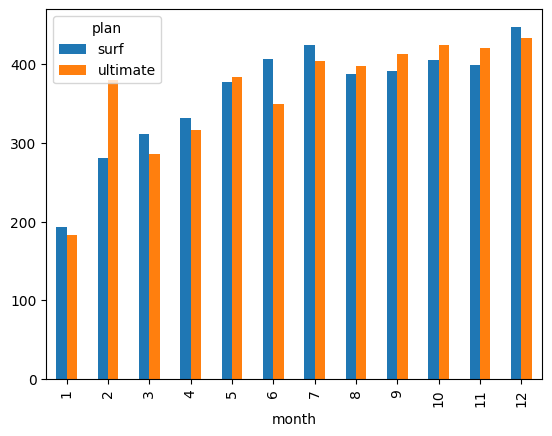

In [56]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.

month_plans = monthly_data.groupby(['plan', 'month'])['minutes_used'].mean().reset_index()

month_plans_pivot = month_plans.pivot(index='month', columns='plan', values='minutes_used')

month_plans_pivot.plot(kind='bar')

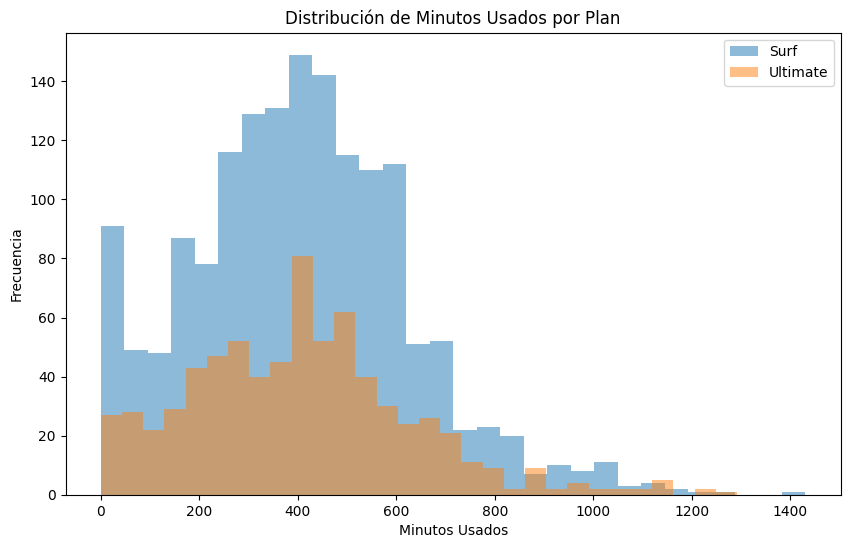

In [65]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.

surf_minutes = monthly_data[monthly_data['plan'] == 'surf']['minutes_used']
ultimate_minutes = monthly_data[monthly_data['plan'] == 'ultimate']['minutes_used']

plt.figure(figsize=(10, 6))
plt.hist(surf_minutes, bins=30, alpha=0.5, label='Surf')
plt.hist(ultimate_minutes, bins=30, alpha=0.5, label='Ultimate')
plt.legend()
plt.xlabel('Minutos Usados')
plt.ylabel('Frecuencia')
plt.title('Distribución de Minutos Usados por Plan')
plt.show()

[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [69]:
# Calcula la media y la varianza de la duración mensual de llamadas.

monthly_data.groupby('plan')['minutes_used'].agg(['mean', 'var'])

,mean,var
plan,,
surf,404.762390,49135.104891
ultimate,406.193083,51640.971402


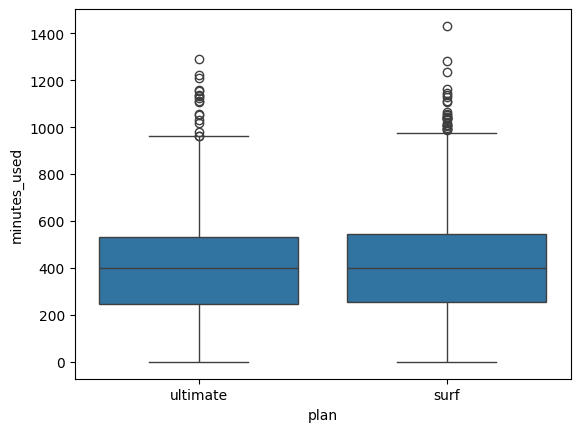

In [70]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas

sns.boxplot(x=monthly_data['plan'], y=monthly_data['minutes_used'])
plt.show()

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a las llamadas. ¿Su comportamiento varía en función del plan?]

> La duración media de las llamadas al mes es muy similar en ambos planes (alrededor de 405 minutos). La distribución de la duración de las llamadas, tal y como se observa en el histograma y el diagrama de caja, también es bastante similar entre los planes Surf y Ultimate. Ambos muestran una distribución sesgada con una cola hacia las llamadas más largas, y los diagramas de caja indican medianas y rangos intercuartílicos similares. La varianza es ligeramente mayor para el plan Ultimate, pero la diferencia no es lo suficientemente sustancial como para sugerir un comportamiento drásticamente diferente basándose únicamente en estas estadísticas.
---
> Por lo tanto, basándome únicamente en la duración de las llamadas, no hay diferencias significativas en el comportamiento de los usuarios entre los planes Surf y Ultimate.

### Mensajes

In [71]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan

month_plans = monthly_data.groupby(['plan', 'month'])['messages_sent'].mean().reset_index()

month_plans_pivot = month_plans.pivot(index='month', columns='plan', values='messages_sent')

month_plans_pivot

plan,surf,ultimate
month,,
1,10.500000,15.500000
2,12.000000,21.571429
3,15.260870,20.250000
4,17.400000,22.047619
5,24.012987,32.103448
6,25.298969,29.340426
7,27.033058,32.830508
8,28.777778,38.478873
9,30.762887,37.895349


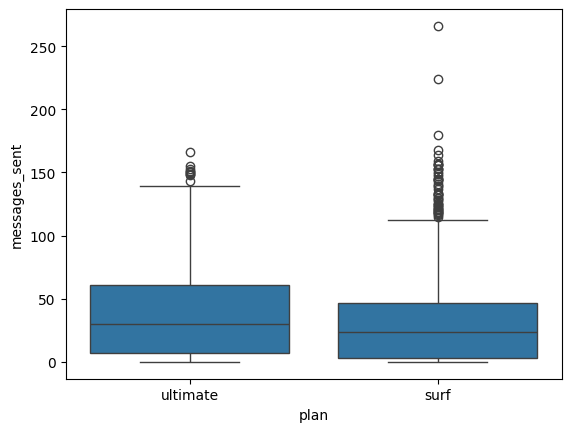

In [73]:
sns.boxplot(x=monthly_data['plan'], y=monthly_data['messages_sent'])
plt.show()

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a los mensajes. ¿Su comportamiento varía en función del plan?]

> Si observamos el número medio de mensajes enviados al mes, los usuarios del plan Ultimate envían constantemente más mensajes que los usuarios del plan Surf a lo largo del año. Aunque ambos planes muestran un aumento en el uso de mensajes hacia finales de año, los usuarios del plan Ultimate mantienen una media más alta.

> El diagrama de caja de los mensajes enviados por plan muestra que la mediana del número de mensajes enviados es mayor en el plan Ultimate en comparación con el plan Surf. La dispersión de los datos también es mayor en el plan Ultimate, lo que indica una mayor variabilidad en el uso de mensajes entre sus usuarios. Ambos planes tienen valores atípicos, pero el plan Ultimate tiene un mayor número de usuarios que envían una gran cantidad de mensajes.
---
> Estas observaciones sugieren que los usuarios del plan Ultimate tienden a enviar más mensajes que los usuarios del plan Surf.

### Internet

In [81]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
monthly_data['gb_used_monthly'] = monthly_data['mb_used_monthly'] / 1024

month_plans = monthly_data.groupby(['plan', 'month'])['gb_used_monthly'].mean().reset_index()
month_plans_pivot = month_plans.pivot(index='month', columns='plan', values='gb_used_monthly')
month_plans_pivot

plan,surf,ultimate
month,,
1,4.760605,6.755950
2,11.893402,16.727352
3,13.032656,17.892108
4,11.703323,15.743803
5,13.609722,16.234846
6,14.942900,14.978439
7,16.390235,15.961664
8,16.401691,17.397188
9,16.202570,16.572138


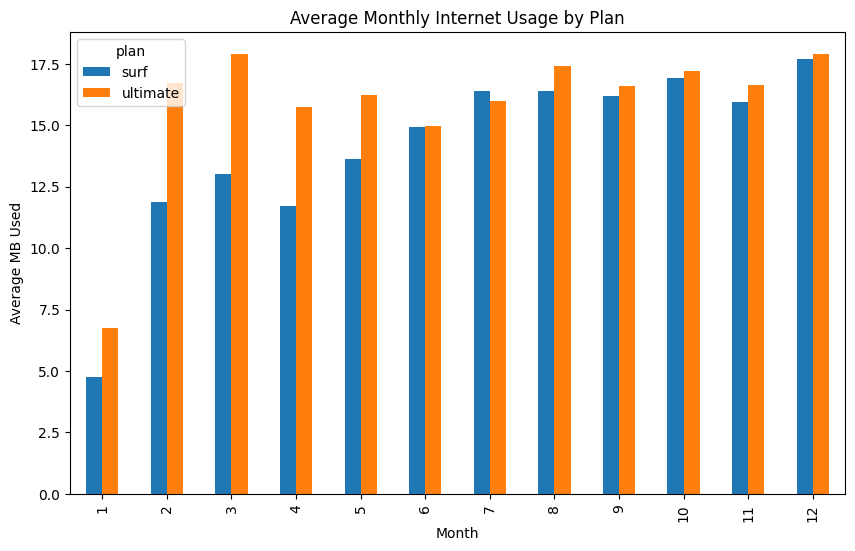

In [82]:
month_plans = monthly_data.groupby(['plan', 'month'])['gb_used_monthly'].mean().reset_index()

month_plans_pivot = month_plans.pivot(index='month', columns='plan', values='gb_used_monthly')

month_plans_pivot.plot(kind='bar', figsize=(10, 6))
plt.title('Average Monthly Internet Usage by Plan')
plt.xlabel('Month')
plt.ylabel('Average MB Used')
plt.show()

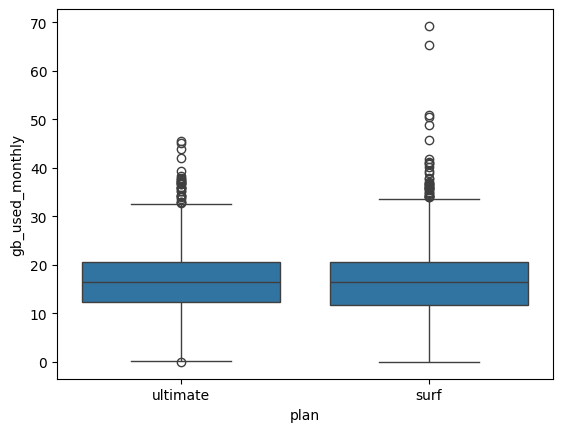

In [83]:
sns.boxplot(x=monthly_data['plan'], y=monthly_data['gb_used_monthly'])
plt.show()

[Elabora las conclusiones sobre cómo los usuarios tienden a consumir el tráfico de Internet. ¿Su comportamiento varía en función del plan?]

> Observando el uso promedio de internet por mes, el plan Ultimate generalmente muestra un uso promedio ligeramente mayor en comparación con el plan Surf, especialmente en los primeros meses del año. Ambos planes muestran una tendencia creciente en el consumo de internet a lo largo del año.

> El diagrama de caja para el uso de internet por plan muestra que la mediana del uso de internet es ligeramente mayor para el plan Ultimate. La dispersión de los datos también es similar entre los dos planes, lo que indica una variabilidad similar en el uso de internet entre sus usuarios. Ambos planes tienen valores atípicos, que representan a los usuarios con un consumo de internet muy alto.

> El uso promedio de internet para el plan Surf es de aproximadamente 15.9 GB y la varianza es de alrededor de 58.8 GB². Para el plan Ultimate, el promedio es de aproximadamente 16.9 GB y la varianza es de alrededor de 58.2 GB². Estos valores respaldan la observación de que los usuarios de Ultimate tienden a consumir ligeramente más datos de internet, aunque la diferencia no es grande y la variabilidad es comparable.
---
> Estas observaciones sugieren que los usuarios del plan Ultimate tienden a consumir ligeramente más tráfico de internet que los usuarios del plan Surf, aunque la diferencia en el uso promedio y la variabilidad no es tan pronunciada como con los mensajes.

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

In [84]:
monthly_data.groupby('plan')['monthly_revenue'].agg(['mean', 'var'])

,mean,var
plan,,
surf,60.327346,3053.955465
ultimate,72.313889,129.848486


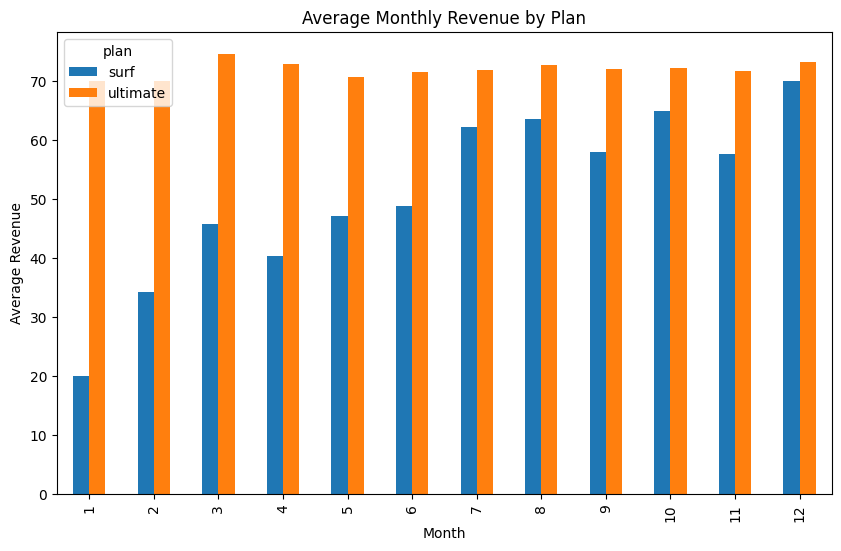

In [87]:
month_plans = monthly_data.groupby(['plan', 'month'])['monthly_revenue'].mean().reset_index()

month_plans_pivot = month_plans.pivot(index='month', columns='plan', values='monthly_revenue')

month_plans_pivot.plot(kind='bar', figsize=(10, 6))
plt.title('Average Monthly Revenue by Plan')
plt.xlabel('Month')
plt.ylabel('Average Revenue')
plt.show()

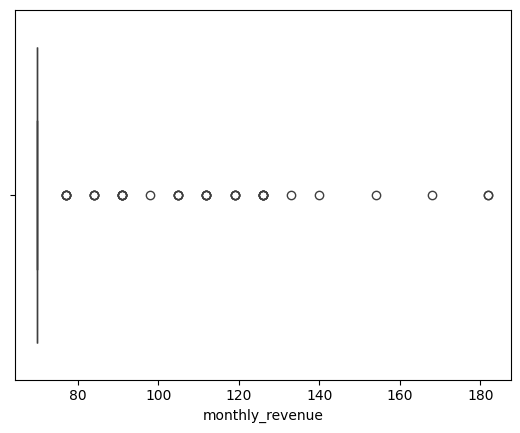

In [90]:
# Ultimate BoxPlot

ultimate_revenue = monthly_data[monthly_data['plan'] == 'ultimate']['monthly_revenue']
sns.boxplot(x=ultimate_revenue)
plt.show()


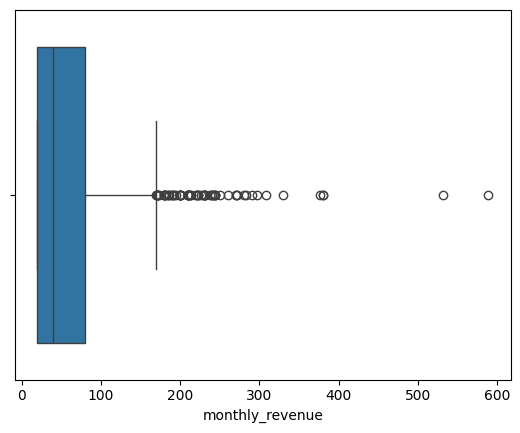

In [91]:
surf_revenue = monthly_data[monthly_data['plan'] == 'surf']['monthly_revenue']
sns.boxplot(x=surf_revenue)
plt.show()

[Elabora las conclusiones sobre cómo difiere el ingreso entre los planes.]

> El ingreso promedio mensual del plan Ultimate es significativamente mayor que el del plan Surf. Esto se ve claramente en el gráfico de barras del ingreso promedio mensual por mes, donde el plan Ultimate mantiene un ingreso promedio consistentemente más alto a lo largo del año.

> La varianza del ingreso mensual es mucho mayor para el plan Surf (3053.96) en comparación con el plan Ultimate (129.85). Esto indica que hay una mayor dispersión en los ingresos generados por los usuarios del plan Surf. El diagrama de caja para el ingreso del plan Surf también muestra una mayor dispersión y la presencia de numerosos valores atípicos con ingresos muy altos, lo que sugiere que muchos usuarios del plan Surf superan sus límites y pagan costos adicionales considerables. En contraste, el diagrama de caja para el plan Ultimate muestra una menor dispersión y menos valores atípicos, lo que indica que la mayoría de los usuarios de Ultimate se mantienen dentro de los límites de su plan o no incurren en costos adicionales tan elevados, ya que su tarifa mensual ya es más alta.
---
> Estas observaciones sugieren que, aunque el plan Ultimate tiene un ingreso mensual fijo más alto, el plan Surf genera ingresos adicionales significativos debido a los costos por uso excedente, lo que resulta en una mayor variabilidad en sus ingresos. Sin embargo, en promedio, el plan Ultimate genera más ingresos por usuario.

# Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

**Hipótesis estadística:**

Para evaluar la hipótesis de que los ingresos promedio de los usuarios de los planes Ultimate y Surf son diferentes, se formularon las siguientes hipótesis:

*   **Hipótesis Nula ($H_0$):** Los ingresos promedio de los usuarios del plan Ultimate son iguales a los ingresos promedio de los usuarios del plan Surf.  
    $H_0: \mu_{Ultimate} = \mu_{Surf}$

*   **Hipótesis Alternativa ($H_1$):** Los ingresos promedio de los usuarios del plan Ultimate son diferentes a los ingresos promedio de los usuarios del plan Surf.  
    $H_1: \mu_{Ultimate} \neq \mu_{Surf}$

**Prueba estadística:**

Dado que se están comparando las medias de dos poblaciones independientes (usuarios del plan Ultimate y usuarios del plan Surf) y no se conoce la desviación estándar de la población, se decidió aplicar una **prueba t de Student para muestras independientes**.  
Debido a que las varianzas de los ingresos de ambos planes presentan diferencias (como se observó en la sección anterior), se utilizó la versión de la prueba t que no asume igualdad de varianzas (**prueba t de Welch**).

**Valor Alfa ($\alpha$):**

Se estableció un nivel de significancia (alpha) de 0.05. Esto implica aceptar un 5% de probabilidad de rechazar la hipótesis nula cuando en realidad es verdadera.  
Si el valor p obtenido en la prueba t es menor que $\alpha$, se rechazará la hipótesis nula y se concluirá que existe una diferencia estadísticamente significativa en los ingresos promedio entre los dos planes.


In [92]:
surf_data = monthly_data[monthly_data['plan'] == 'surf']['monthly_revenue']
ultimate_data = monthly_data[monthly_data['plan'] == 'ultimate']['monthly_revenue']

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [96]:
alpha = 0.05

results = stats.ttest_ind(surf_data, ultimate_data, equal_var=False)
print("T-statistic:", results.statistic)
print("P-value:", results.pvalue)

T-statistic: -8.228840784742438
P-value: 3.5320199509520717e-16
TtestResult(statistic=np.float64(-8.228840784742438), pvalue=np.float64(3.5320199509520717e-16), df=np.float64(1842.8454183263275))


In [98]:
if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula: La media de ingresos de los usuarios del plan Ultimate es diferente a la de los usuarios del plan Surf.")
else:
    print("No rechazamos la hipótesis nula: No hay suficiente evidencia para decir que la media de ingresos de los usuarios del plan Ultimate es diferente a la de los usuarios del plan Surf.")

Rechazamos la hipótesis nula: La media de ingresos de los usuarios del plan Ultimate es diferente a la de los usuarios del plan Surf.


[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

**Hipótesis estadística:**

Para probar la hipótesis de que los ingresos promedio de los usuarios en el área NY-NJ son diferentes a los de los usuarios de otras regiones, se formularon las siguientes hipótesis:

*   **Hipótesis Nula ($H_0$):** Los ingresos promedio de los usuarios en el área NY-NJ son iguales a los ingresos promedio de los usuarios de otras regiones.  
    $H_0: \mu_{NY-NJ} = \mu_{Otras Regiones}$

*   **Hipótesis Alternativa ($H_1$):** Los ingresos promedio de los usuarios en el área NY-NJ son diferentes a los ingresos promedio de los usuarios de otras regiones.  
    $H_1: \mu_{NY-NJ} \neq \mu_{Otras Regiones}$

**Prueba estadística:**

Dado que se están comparando las medias de dos poblaciones independientes (usuarios en el área NY-NJ y usuarios de otras regiones) y no se conoce la desviación estándar de la población, se optó por utilizar una **prueba t de Student para muestras independientes**.  
Al no disponerse de información previa sobre la igualdad de varianzas entre ambos grupos, se empleó la versión de la prueba t que no asume igualdad de varianzas (**prueba t de Welch**).

**Valor Alfa ($\alpha$):**

Se estableció un nivel de significancia (alpha) de 0.05. Esto implica aceptar un 5% de probabilidad de rechazar la hipótesis nula cuando en realidad es verdadera.  
Si el valor p obtenido en la prueba t resulta menor que $\alpha$, se rechazará la hipótesis nula y se concluirá que existe una diferencia estadísticamente significativa en los ingresos promedio entre los dos grupos de usuarios.


In [100]:
ny_nj_users = users_df[users_df['city'].str.contains('NY-NJ', case=False)]['user_id']
ny_nj_revenue = monthly_data[monthly_data['user_id'].isin(ny_nj_users)]['monthly_revenue']

other_regions_revenue = monthly_data[~monthly_data['user_id'].isin(ny_nj_users)]['monthly_revenue']

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [102]:
alpha = 0.05
results_ny_nj = stats.ttest_ind(ny_nj_revenue, other_regions_revenue, equal_var=False)

print("T-statistic (NY-NJ vs Otras Regiones):", results_ny_nj.statistic)
print("P-value (NY-NJ vs Otras Regiones):", results_ny_nj.pvalue)

T-statistic (NY-NJ vs Otras Regiones): -2.1597353056435127
P-value (NY-NJ vs Otras Regiones): 0.031214139070912725


In [103]:
if results_ny_nj.pvalue < alpha:
    print("Rechazamos la hipótesis nula: La media de ingresos de los usuarios del área NY-NJ es diferente a la de los usuarios de otras regiones.")
else:
    print("No rechazamos la hipótesis nula: No hay suficiente evidencia para decir que la media de ingresos de los usuarios del área NY-NJ es diferente a la de los usuarios de otras regiones.")

Rechazamos la hipótesis nula: La media de ingresos de los usuarios del área NY-NJ es diferente a la de los usuarios de otras regiones.


# Conclusión general

[En esta sección final, enumera tus conclusiones importantes. Asegúrate de que estas abarquen todas las decisiones (suposiciones) importantes que adoptaste y que determinaron la forma elegida para procesar y analizar los datos.]



**Decisiones y Suposiciones Importantes:**

1.  **Manejo de Fechas:** Convertí las columnas de fecha (`reg_date`, `churn_date`, `call_date`, `session_date`, `message_date`) a tipo *datetime* para poder realizar análisis temporales. Mantuvé los valores ausentes en `churn_date`, ya que representan a usuarios activos.
2.  **Manejo de Valores Cero en Duración de Llamadas y Uso de Internet:** Decidí conservar los valores iguales a cero en la duración de llamadas y en el uso de internet dentro de los DataFrames correspondientes (`calls_df`, `internet_df`). Supuse que estos valores reflejan llamadas perdidas o muy cortas, o sesiones de internet fallidas o muy breves, y consideré que forman parte del comportamiento real del usuario que debía incluir en el análisis.
3.  **Agregación de Datos:** Agrupé los datos de llamadas, mensajes e internet por `user_id` y `month` para obtener un resumen mensual del comportamiento de cada usuario. Este paso fue fundamental para calcular el ingreso mensual por usuario.
4.  **Manejo de Valores Ausentes en Datos Agregados:** Rellené con 0 los valores ausentes en el DataFrame `monthly_data` (después de fusionar los datos). Supuse que un valor ausente significa que el usuario no utilizó ese servicio (llamadas, mensajes o internet) durante ese mes, por lo que un valor de 0 era adecuado.
5.  **Cálculo del Ingreso Mensual:** Definí una función para calcular el ingreso mensual por usuario, considerando los límites de cada plan y los costos adicionales por uso excedente. Redondeé hacia arriba el exceso de megabytes al calcular el costo adicional por gigabyte, siguiendo la práctica común de facturación.
6.  **Pruebas de Hipótesis:** Para comparar las medias de ingresos entre los planes y entre las regiones (NY-NJ vs otras), utilicé la prueba t de Student para muestras independientes. Elegí la versión que no asume igualdad de varianzas (prueba t de Welch), ya que observé diferencias en las varianzas de los ingresos entre los grupos. Establecí un nivel de significancia (alpha) de 0.05 para ambas pruebas.

---

**Conclusiones Importantes:**

1.  **Comportamiento de Llamadas:** No observé diferencias significativas en la duración promedio de las llamadas ni en la distribución de su duración entre los usuarios de los planes Surf y Ultimate.
2.  **Comportamiento de Mensajes:** Noté que los usuarios del plan Ultimate tienden a enviar más mensajes que los del plan Surf. La media y la dispersión del número de mensajes enviados son mayores en el plan Ultimate.
3.  **Comportamiento de Internet:** Los usuarios del plan Ultimate tienden a consumir ligeramente más tráfico de internet que los del plan Surf, aunque la diferencia en el uso promedio y su variabilidad no es tan marcada como en el caso de los mensajes.
4.  **Ingresos por Plan:** Encontré que el ingreso promedio mensual del plan Ultimate es significativamente mayor que el del plan Surf. Aunque el plan Surf puede generar ingresos adicionales elevados por uso excedente (lo que se refleja en su mayor varianza), el ingreso base más alto del plan Ultimate produce un ingreso promedio por usuario superior.
5.  **Ingresos por Región (NY-NJ vs Otras):** La prueba de hipótesis mostró que existe una diferencia estadísticamente significativa en los ingresos promedio entre los usuarios del área NY-NJ y los de otras regiones.

---

**Conclusión:**

Basándome en este análisis preliminar, concluí que el plan **Ultimate** genera más ingresos promedio por usuario que el plan Surf. Aunque el plan Surf tiene potencial para generar altos ingresos por los costos de uso excedente, su variabilidad es considerablemente mayor.  
Por ello, recomiendo que la empresa enfoque sus esfuerzos publicitarios en atraer usuarios hacia el plan Ultimate, dado su mayor ingreso promedio y menor variabilidad. No obstante, también considero valioso investigar más a fondo el comportamiento de los usuarios del plan Surf que generan ingresos adicionales altos, con el fin de entender cómo replicar ese comportamiento o ajustar la tarifa Surf para mejorar su rentabilidad.
